In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset.csv")
df

,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,...,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_year,issue_date_month,issue_date_day,issue_date_weekday,issue_date_hour
0,CA,INDIVIDUAL,4 years,"Windsor Solutions, Inc.",D,RENT,2021-08-07,2021-07-15,2021-07-12,Current,...,62.006774,0.161206,9586.945180,1.953600,NaN,2021,8,7,5,0
1,PA,INDIVIDUAL,3 years,Grant & Eisenhofer,C,MORTGAGE,2021-04-09,2021-05-16,2021-03-13,Charged Off,...,373.547998,0.117188,2213.200815,22.458280,12901.399781,2021,4,9,4,0
2,DC,INDIVIDUAL,6 years,VALLEY PLUMBING COMPANY,B,RENT,2021-07-10,2021-05-16,2021-03-12,Fully Paid,...,529.631006,0.089163,15608.890161,NaN,10082.118704,2021,7,10,5,0
3,WI,INDIVIDUAL,7 years,Housing Investments Inc,G,MORTGAGE,2021-10-11,2021-04-16,2021-07-14,Fully Paid,...,1057.386266,0.171302,16700.391717,2.814647,NaN,2021,10,11,0,0
4,NY,INDIVIDUAL,10+ years,Massage Envy,C,MORTGAGE,2021-01-10,2021-10-12,2021-01-14,Charged Off,...,510.555677,0.091857,4109.600739,NaN,13485.994361,2021,1,10,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,TX,INDIVIDUAL,4 years,Bath and Body Works,C,MORTGAGE,2021-11-09,2021-02-13,2021-10-14,Fully Paid,...,374.438907,0.153717,10409.513686,26.351786,16376.396218,2021,11,9,1,0
74997,CO,INDIVIDUAL,5 years,B&W,A,RENT,2021-12-11,2021-11-14,2021-03-11,Fully Paid,...,565.528528,0.047282,5688.622795,11.314196,11387.744804,2021,12,11,5,0
74998,CT,INDIVIDUAL,5 years,Motiva Enterprises,F,RENT,2021-10-11,2021-11-14,2021-11-10,Fully Paid,...,360.823876,0.211030,9966.287828,12.771098,26088.288340,2021,10,11,0,0
74999,CA,INDIVIDUAL,6 years,Penmark Management LLC.,C,MORTGAGE,2021-09-11,2021-06-14,2021-10-13,Charged Off,...,368.929932,0.130109,NaN,19.545008,15235.473986,2021,9,11,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address_state          75001 non-null  object 
 1   application_type       75001 non-null  object 
 2   emp_length             75001 non-null  object 
 3   emp_title              75001 non-null  object 
 4   grade                  75001 non-null  object 
 5   home_ownership         75001 non-null  object 
 6   issue_date             75001 non-null  object 
 7   last_credit_pull_date  75001 non-null  object 
 8   last_payment_date      75001 non-null  object 
 9   loan_status            75001 non-null  object 
 10  next_payment_date      75001 non-null  object 
 11  member_id              75001 non-null  float64
 12  purpose                75001 non-null  object 
 13  term                   75001 non-null  object 
 14  verification_status    75001 non-null  object 
 15  an

In [4]:
df.describe()

,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_date_year,issue_date_month,issue_date_day,issue_date_weekday,issue_date_hour
count,7.500100e+04,67501.000000,63751.000000,71251.000000,60001.000000,67501.000000,67501.000000,56251.000000,75001.0,75001.000000,75001.000000,75001.000000,75001.0
mean,8.640305e+05,75948.832640,0.136321,397.494234,0.152150,14007.703085,22.509181,15494.180602,2021.0,7.154291,10.384262,3.181318,0.0
std,2.543110e+05,63434.809268,0.064982,243.407272,0.055995,8782.891714,12.312632,11643.633459,0.0,3.413656,0.856953,1.929661,0.0
min,-2.805403e+05,-294461.966161,-0.152320,-470.742442,-0.050444,-22068.213300,-38.525663,-31937.824830,2021.0,1.000000,1.000000,0.000000,0.0
25%,6.944521e+05,35288.245569,0.093132,229.230220,0.112169,7879.163712,14.276190,7516.531265,2021.0,4.000000,10.000000,2.000000,0.0
50%,8.662858e+05,75400.804843,0.136576,383.682593,0.154825,13378.452336,22.484164,14241.661213,2021.0,7.000000,11.000000,3.000000,0.0
75%,1.034790e+06,116750.076136,0.180279,553.312134,0.193558,19649.635508,30.649657,22418.619925,2021.0,10.000000,11.000000,5.000000,0.0
max,1.924209e+06,419877.028635,0.463241,1551.686432,0.344403,55775.851091,78.813748,71119.927451,2021.0,12.000000,25.000000,6.000000,0.0


In [5]:
df.isna().sum()

address_state                0
application_type             0
emp_length                   0
emp_title                    0
grade                        0
home_ownership               0
issue_date                   0
last_credit_pull_date        0
last_payment_date            0
loan_status                  0
next_payment_date            0
member_id                    0
purpose                      0
term                         0
verification_status          0
annual_income             7500
dti                      11250
installment               3750
int_rate                 15000
loan_amount               7500
total_acc                 7500
total_payment            18750
issue_date_year              0
issue_date_month             0
issue_date_day               0
issue_date_weekday           0
issue_date_hour              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(['application_type', 'emp_title','issue_date_year','issue_date_month', 'issue_date_day', 'issue_date_weekday', 'issue_date_hour'], axis=1, inplace=True)


In [8]:
df.head()

,address_state,emp_length,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,CA,4 years,D,RENT,2021-08-07,2021-07-15,2021-07-12,Current,2021-07-13,1.251026e+06,Debt consolidation,36 months,Source Verified,82438.124601,0.072151,62.006774,0.161206,9586.945180,1.953600,NaN
1,PA,3 years,C,MORTGAGE,2021-04-09,2021-05-16,2021-03-13,Charged Off,2022-01-13,2.947135e+05,wedding,36 months,Not Verified,52347.892639,0.140367,373.547998,0.117188,2213.200815,22.458280,12901.399781
2,DC,6 years,B,RENT,2021-07-10,2021-05-16,2021-03-12,Fully Paid,2021-08-14,6.013015e+05,Debt consolidation,36 months,Verified,-38314.485684,0.125850,529.631006,0.089163,15608.890161,NaN,10082.118704
3,WI,7 years,G,MORTGAGE,2021-10-11,2021-04-16,2021-07-14,Fully Paid,2021-05-15,1.027941e+06,Debt consolidation,60 months,Verified,254889.785659,0.148349,1057.386266,0.171302,16700.391717,2.814647,NaN
4,NY,10+ years,C,MORTGAGE,2021-01-10,2021-10-12,2021-01-14,Charged Off,2021-02-15,1.087496e+06,credit card,60 months,Verified,NaN,NaN,510.555677,0.091857,4109.600739,NaN,13485.994361


In [9]:
df.drop('member_id', axis=1, inplace=True)

In [10]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].abs()

In [11]:
df

,address_state,emp_length,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,purpose,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,CA,4 years,D,RENT,2021-08-07,2021-07-15,2021-07-12,Current,2021-07-13,Debt consolidation,36 months,Source Verified,82438.124601,0.072151,62.006774,0.161206,9586.945180,1.953600,NaN
1,PA,3 years,C,MORTGAGE,2021-04-09,2021-05-16,2021-03-13,Charged Off,2022-01-13,wedding,36 months,Not Verified,52347.892639,0.140367,373.547998,0.117188,2213.200815,22.458280,12901.399781
2,DC,6 years,B,RENT,2021-07-10,2021-05-16,2021-03-12,Fully Paid,2021-08-14,Debt consolidation,36 months,Verified,38314.485684,0.125850,529.631006,0.089163,15608.890161,NaN,10082.118704
3,WI,7 years,G,MORTGAGE,2021-10-11,2021-04-16,2021-07-14,Fully Paid,2021-05-15,Debt consolidation,60 months,Verified,254889.785659,0.148349,1057.386266,0.171302,16700.391717,2.814647,NaN
4,NY,10+ years,C,MORTGAGE,2021-01-10,2021-10-12,2021-01-14,Charged Off,2021-02-15,credit card,60 months,Verified,NaN,NaN,510.555677,0.091857,4109.600739,NaN,13485.994361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74996,TX,4 years,C,MORTGAGE,2021-11-09,2021-02-13,2021-10-14,Fully Paid,2021-08-14,Debt consolidation,36 months,Verified,139022.223332,0.237799,374.438907,0.153717,10409.513686,26.351786,16376.396218
74997,CO,5 years,A,RENT,2021-12-11,2021-11-14,2021-03-11,Fully Paid,2021-09-12,medical,60 months,Verified,36642.312324,0.089881,565.528528,0.047282,5688.622795,11.314196,11387.744804
74998,CT,5 years,F,RENT,2021-10-11,2021-11-14,2021-11-10,Fully Paid,2021-06-16,Debt consolidation,60 months,Source Verified,NaN,0.103079,360.823876,0.211030,9966.287828,12.771098,26088.288340
74999,CA,6 years,C,MORTGAGE,2021-09-11,2021-06-14,2021-10-13,Charged Off,2021-02-13,medical,36 months,Verified,123554.693553,0.198773,368.929932,0.130109,NaN,19.545008,15235.473986


In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for col in num_cols:
#     plt.figure(figsize=(6,4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f"{col} | Skewness: {df[col].skew():.2f}")
#     plt.show()


In [13]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [14]:
date_cols = ['issue_date', 'last_credit_pull_date','last_payment_date','next_payment_date']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   address_state          75001 non-null  object        
 1   emp_length             75001 non-null  object        
 2   grade                  75001 non-null  object        
 3   home_ownership         75001 non-null  object        
 4   issue_date             75001 non-null  datetime64[ns]
 5   last_credit_pull_date  75001 non-null  datetime64[ns]
 6   last_payment_date      75001 non-null  datetime64[ns]
 7   loan_status            75001 non-null  object        
 8   next_payment_date      75001 non-null  datetime64[ns]
 9   purpose                75001 non-null  object        
 10  term                   75001 non-null  object        
 11  verification_status    75001 non-null  object        
 12  annual_income          75001 non-null  float64       
 13  d

In [16]:
df['days_until_next_payment'] = (df['next_payment_date'] - df['issue_date']).dt.days
df['days_since_last_credit_pull'] = (df['issue_date'] - df['last_credit_pull_date']).dt.days
df['days_since_last_payment'] = (df['issue_date'] - df['last_payment_date']).dt.days
df['credit_to_payment_gap'] = (df['last_payment_date'] - df['last_credit_pull_date']).dt.days
df['loan_duration_days'] = (df['next_payment_date'] - df['issue_date']).dt.days
df['loan_to_income'] = df['loan_amount'] / df['annual_income']
df['installment_to_income'] = df['installment'] / df['annual_income']
df['payment_to_income'] = df['total_payment'] / df['annual_income']
df['total_interest'] = df['total_payment'] - df['loan_amount']  # total interest paid
df['interest_ratio'] = df['total_interest'] / df['loan_amount']  # interest as % of loan
df['payment_per_account'] = df['total_payment'] / (df['total_acc'] + 1)  # avoid div by 0

In [17]:
df.drop(['issue_date', 'last_credit_pull_date','last_payment_date', 'next_payment_date'], axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale
numeric_cols = [
    'annual_income', 'dti', 'installment', 
    'int_rate', 'loan_amount', 'total_acc', 'total_payment'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check result
print(df[numeric_cols].head())

   annual_income       dti  installment  int_rate  loan_amount  total_acc  \
0      -0.003075 -1.118096    -1.515341  0.169865    -0.579538  -1.881626   
1      -0.595034  0.055641    -0.133464 -0.710178    -1.509725  -0.031514   
2      -0.871111 -0.194142     0.558860 -1.270479     0.180121  -0.028660   
3       3.389530  0.192987     2.899779  0.371713     0.317812  -1.803935   
4      -0.110230 -0.009528     0.474249 -1.216633    -1.270497  -0.028660   

   total_payment  
0      -0.142943  
1      -0.291319  
2      -0.591406  
3      -0.142943  
4      -0.229095  


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_cols = ['emp_length','term']

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df['loan_status'] = le.fit_transform(df['loan_status'])


In [20]:
onehot_cols = [
    'address_state',
    'home_ownership',
    'purpose',
    'verification_status'
]

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [21]:
df.head()

,emp_length,grade,loan_status,term,annual_income,dti,installment,int_rate,loan_amount,total_acc,...,purpose_major purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified
0,4,D,1,0,-0.003075,-1.118096,-1.515341,0.169865,-0.579538,-1.881626,...,False,False,False,False,False,False,False,False,True,False
1,3,C,0,0,-0.595034,0.055641,-0.133464,-0.710178,-1.509725,-0.031514,...,False,False,False,False,False,False,False,True,False,False
2,6,B,2,0,-0.871111,-0.194142,0.558860,-1.270479,0.180121,-0.028660,...,False,False,False,False,False,False,False,False,False,True
3,7,G,2,1,3.389530,0.192987,2.899779,0.371713,0.317812,-1.803935,...,False,False,False,False,False,False,False,False,False,True
4,1,C,0,1,-0.110230,-0.009528,0.474249,-1.216633,-1.270497,-0.028660,...,False,False,False,False,False,False,False,False,False,True


In [22]:
## manually mapping is better
grade_map = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
df['grade'] = df['grade'].map(grade_map)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 90 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   emp_length                           75001 non-null  int64  
 1   grade                                75001 non-null  int64  
 2   loan_status                          75001 non-null  int64  
 3   term                                 75001 non-null  int64  
 4   annual_income                        75001 non-null  float64
 5   dti                                  75001 non-null  float64
 6   installment                          75001 non-null  float64
 7   int_rate                             75001 non-null  float64
 8   loan_amount                          75001 non-null  float64
 9   total_acc                            75001 non-null  float64
 10  total_payment                        75001 non-null  float64
 11  days_until_next_payment     

In [24]:
X = df.drop(columns=['grade'])
y = df['grade']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [26]:
# # List of datetime columns
# date_cols = [
#     'issue_date',
#     'last_credit_pull_date',
#     'last_payment_date',
#     'next_payment_date'
# ]

# # Convert datetime columns to numeric features (year and month)
# for col in date_cols:
#     X_train[col + '_year'] = X_train[col].dt.year
#     X_train[col + '_month'] = X_train[col].dt.month
#     X_test[col + '_year'] = X_test[col].dt.year
#     X_test[col + '_month'] = X_test[col].dt.month

# # Drop original datetime columns
# X_train = X_train.drop(columns=date_cols)
# X_test = X_test.drop(columns=date_cols)

# # Check again
# print(X_train.dtypes.value_counts())


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#import pipeline 
from sklearn.pipeline import Pipeline
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve 
from sklearn.model_selection import cross_val_score

In [28]:
models = {
    # 'Logistic Regression': LogisticRegression(
    #     random_state=42, max_iter=10000
    # ),
    # 'KNN': KNeighborsClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'Decision Tree': DecisionTreeClassifier(random_state=42),
    # 'Random Forest': RandomForestClassifier(random_state=42),
    # 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(
        random_state=42,
        eval_metric='auc'
    )
}

best_model = None
best_roc = 0.0

In [29]:
for name, model in models.items():
    print(f"Training {name}...")  # Show which model is training

    pipeline = Pipeline([
        ('model', model)
    ])

    # Cross-validation ROC-AUC (multiclass ovr if needed)
    try:
        cv_roc = cross_val_score(
            pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='roc_auc_ovr'  # multiclass ROC-AUC automatically
        ).mean()
    except:
        # Fallback if binary only
        cv_roc = cross_val_score(
            pipeline,
            X_train,
            y_train,
            cv=5,
            scoring='roc_auc'
        ).mean()

    # Train
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Probabilities (for ROC)
    if hasattr(pipeline, "predict_proba"):
        y_proba = pipeline.predict_proba(X_test)
    else:
        y_proba = pipeline.decision_function(X_test)

    # Ensure proper numpy array for metrics
    y_test_int = np.array(y_test, dtype=int)
    y_pred_int = np.array(y_pred, dtype=int)

    # Compute metrics
    accuracy = accuracy_score(y_test_int, y_pred_int)

    # ROC-AUC calculation (handle multiclass automatically)
    if y_proba.ndim == 1 or y_proba.shape[1] == 2:
        # Binary classification: take probability of positive class
        roc = roc_auc_score(y_test_int, y_proba[:, 1] if y_proba.ndim > 1 else y_proba)
    else:
        # Multiclass: use ovr
        roc = roc_auc_score(y_test_int, y_proba, multi_class='ovr', average='macro')

    # Print metrics immediately
    print(f"Model: {name}")
    print(f"CV ROC-AUC: {cv_roc:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test ROC-AUC: {roc:.4f}")
    print("-" * 50)

    # Track best model based on ROC-AUC
    if roc > best_roc:
        best_roc = roc
        best_model = pipeline

print(f"Best Model: {best_model} with Test ROC-AUC: {best_roc:.4f}")


Training XGBoost...
Model: XGBoost
CV ROC-AUC: 0.8424
Test Accuracy: 0.4411
Test ROC-AUC: 0.8439
--------------------------------------------------
Best Model: Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=No

In [31]:
import xgboost as xgb
classifier = xgb.XGBClassifier(
  max_depth= 4, learning_rate= 0.09056528791484555, n_estimators= 559, subsample= 0.8743324817124126, colsample_bytree= 0.7900735895227784, min_child_weight= 4, gamma= 0.24293226073667662, reg_alpha= 1.3354071182374732, reg_lambda= 1.072457795575417
)

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

# Get predicted probabilities
y_proba = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

# If multiclass, specify multi_class
roc = roc_auc_score(y, y_proba, multi_class='ovr')
print("ROC-AUC:", roc)


ROC-AUC: 0.8501002308293957


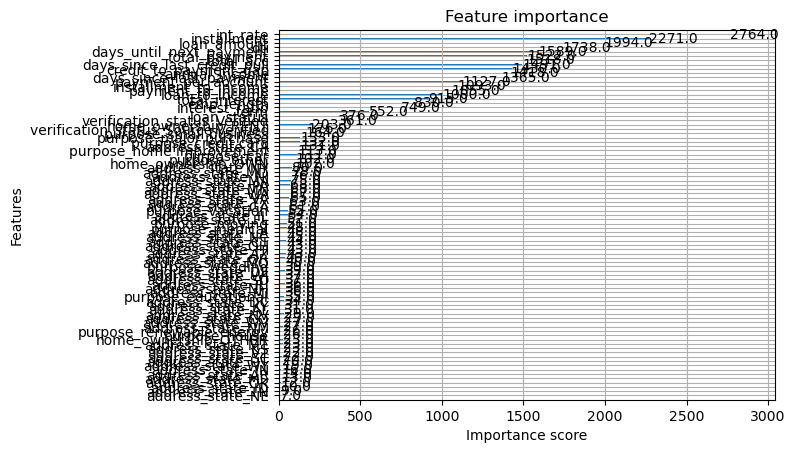

Feature: emp_length, Score: 0.00817339587956667
Feature: loan_status, Score: 0.02288226969540119
Feature: term, Score: 0.11138499528169632
Feature: annual_income, Score: 0.015631739050149918
Feature: dti, Score: 0.008225183933973312
Feature: installment, Score: 0.017956290394067764
Feature: int_rate, Score: 0.11368498206138611
Feature: loan_amount, Score: 0.02126077190041542
Feature: total_acc, Score: 0.009056181646883488
Feature: total_payment, Score: 0.02258548140525818
Feature: days_until_next_payment, Score: 0.007707909680902958
Feature: days_since_last_credit_pull, Score: 0.007816988974809647
Feature: days_since_last_payment, Score: 0.007652928587049246
Feature: credit_to_payment_gap, Score: 0.007596725597977638
Feature: loan_duration_days, Score: 0.0
Feature: loan_to_income, Score: 0.008654403500258923
Feature: installment_to_income, Score: 0.007930312305688858
Feature: payment_to_income, Score: 0.008233785629272461
Feature: total_interest, Score: 0.008010154590010643
Feature: in

In [34]:
# Import necessary libraries
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train already defined
# First, create and fit the model
classifier = xgb.XGBClassifier()  # or XGBRegressor() depending on your task
classifier.fit(X_train, y_train)  # This line is crucial - fit the model to your data

# Now you can plot feature importance
plot_importance(classifier)
plt.show()

# Or get importance as numbers
importance = classifier.feature_importances_  # Use classifier instead of model for consistency
for i, v in enumerate(importance):
    print(f"Feature: {X_train.columns[i]}, Score: {v}")